# PNEUMONIA - CHEST XRAY CLASSIFIER (INTO NORMAL, VIRAL and BACTERIAL PNEUMONIA)

We made a pneumonia classifier using the Fast.ai library and ResNet CNN model. The classifier is designed to detect the type of pneumonia in medical images, which will aid doctors in making informed treatment decisions. With this tool, we hope to contribute to improving healthcare outcomes

As we have viral and bacterial pneumonia images in the same folder, we will separate them into 2 different folders one for VIRAL and another BACTERIAL

## Preprocessing

In [3]:
import os
import shutil

# define the input folder path
input_folder = "C:\\Users\\navya\\Downloads\\ibm data\\xraychest"

# define the output folder paths
bacteria_folder = "C:\\Users\\navya\\Downloads\\ibm data\\xraychest\\Pneumonia_bacteria"
virus_folder = "C:\\Users\\navya\\Downloads\\ibm data\\xraychest\\Pneumonia_virus"

# create the output folders if they don't exist
os.makedirs(bacteria_folder, exist_ok=True)
os.makedirs(virus_folder, exist_ok=True)

# loop through all the files in the input folder
for filename in os.listdir(input_folder):
    # check if the filename contains "bacteria" or "virus"
    if "bacteria" in filename.lower():
        # move the file to the bacteria folder
        shutil.move(os.path.join(input_folder, filename), bacteria_folder)
    elif "virus" in filename.lower():
        # move the file to the virus folder
        shutil.move(os.path.join(input_folder, filename), virus_folder)

In [4]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

In [5]:
lung_types = 'NORMAL','VIRUS','BACTERIA'
path = Path('C:\\Users\\navya\\Downloads\\ibm data\\xraychest')

In [6]:
lungs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms = Resize(128)
)

dls = lungs.dataloaders(path)

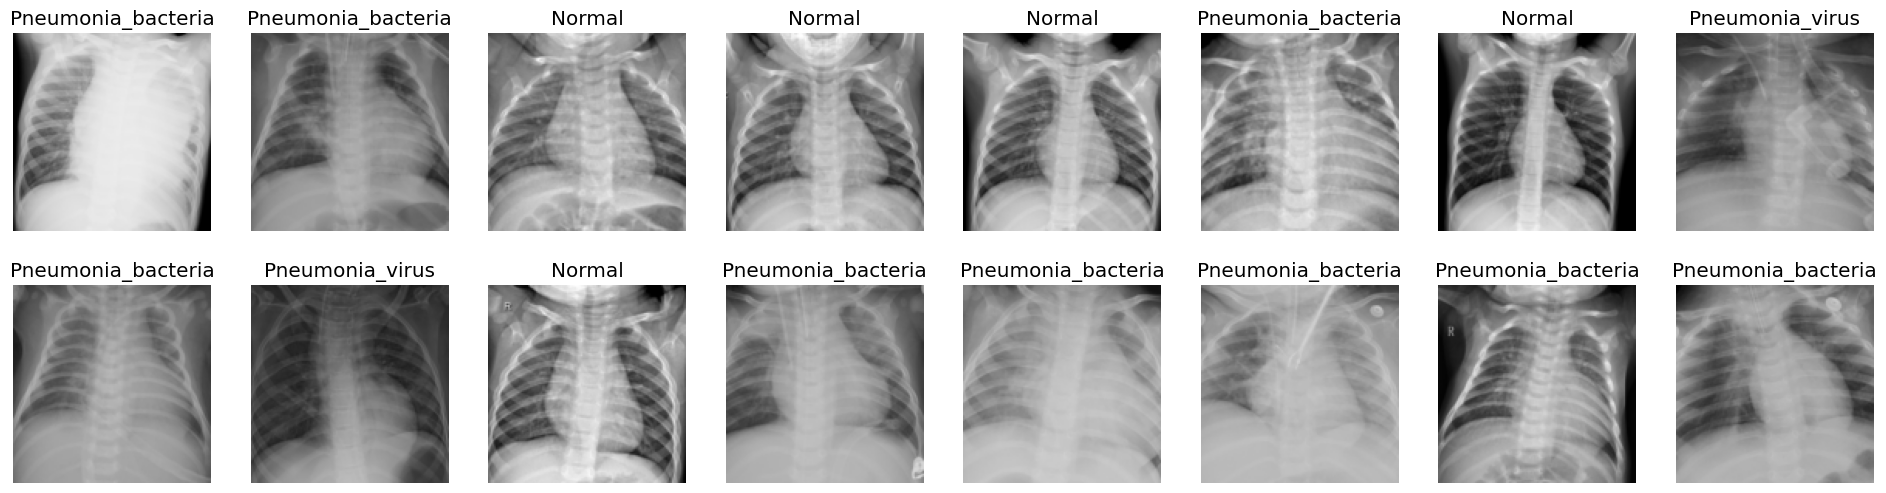

In [7]:
dls.valid.show_batch(max_n=16, nrows=2)

In [9]:
learn = vision_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(25)

epoch,train_loss,valid_loss,accuracy,time
0,1.171808,0.966481,0.663471,04:39


epoch,train_loss,valid_loss,accuracy,time
0,0.825456,0.706949,0.722915,05:50
1,0.699376,0.600036,0.753595,05:50
2,0.590138,0.589700,0.764142,05:47
3,0.530565,0.530200,0.772771,05:55
4,0.485752,0.474196,0.794823,05:55
5,0.437318,0.486060,0.799617,06:01
6,0.401167,0.488968,0.791946,05:59
7,0.368907,0.467947,0.784276,05:57
8,0.325621,0.496405,0.782359,06:05
9,0.278626,0.493469,0.806328,27:38


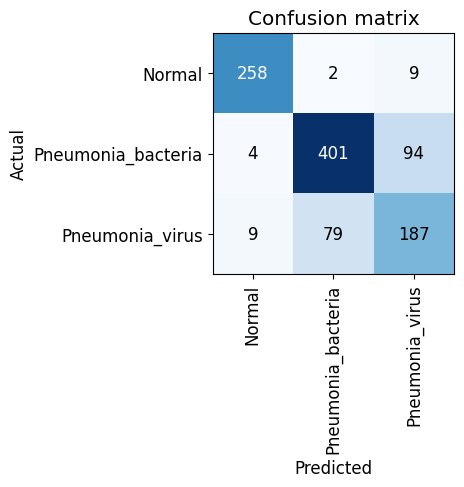

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

## Testing our model

In [3]:
learn.export()

NameError: name 'learn' is not defined

In [12]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [2]:
learn_inf = load_learner(path/'export.pkl')

NameError: name 'load_learner' is not defined

In [14]:
learn_inf.predict("C:\\Users\\navya\\Downloads\\ibm data\\xraychest\\Pneumonia_bacteria\\person998_bacteria_2928.jpeg")  #path of the image we're testing

('Pneumonia_bacteria', tensor(1), tensor([2.5714e-06, 9.9950e-01, 4.9450e-04]))

In [15]:
learn_inf.predict("C:\\Users\\navya\\Downloads\\ibm data\\xraychest\\Normal\\NORMAL2-IM-1406-0001.jpeg")

('Normal', tensor(0), tensor([9.9999e-01, 8.9174e-09, 8.2022e-06]))

In [1]:
learn_inf.predict("C:\\Users\\navya\\Downloads\\ibm data\\xraychest\\Pneumonia_virus\\person97_virus_181.jpeg")

NameError: name 'learn_inf' is not defined

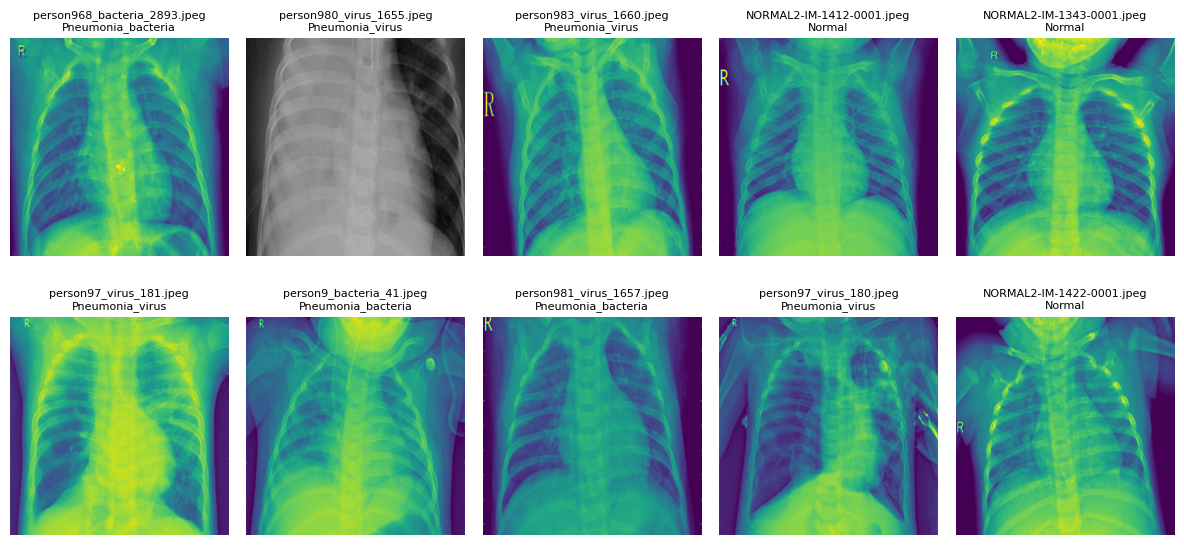

In [17]:
import random
from PIL import Image

# Get the paths to 10 random test images
test_path = Path("C:\\Users\\navya\\OneDrive\\Documents\\sample")
test_images = get_image_files(test_path)
random_images = random.sample(test_images, 10)

# Load the exported learner
learn_inf = load_learner(path/'export.pkl')

# Create a 2x5 table to display the images and their predictions
fig, ax = plt.subplots(2, 5, figsize=(12, 6))

# Loop through the 10 images and show the predicted labels
for i, img_path in enumerate(random_images):
    img = Image.open(img_path)
    img = img.resize((224, 224))
    predicted_label, _, _ = learn_inf.predict(img)
    
    # Display the image along with the predicted label
    row = i // 5
    col = i % 5
    ax[row, col].imshow(img)
    ax[row, col].axis('off')
    ax[row, col].set_title(f"{img_path.name}\n{predicted_label}", fontsize=8)

plt.tight_layout()
plt.show()
